In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")
pd.options.display.max_columns = None

In [2]:
input_file = r'../data/processed_data/Transformed.xlsx'
weo_df = pd.read_excel(input_file)

In [3]:
weo_df.head(5)

,WEO Country Code,Country,Year,Current account balance - Percent of GDP (Units),Current account balance - U.S. dollars (Billions),Employment - Persons (Millions),General government gross debt - National currency (Billions),General government gross debt - Percent of GDP (Units),General government net debt - National currency (Billions),General government net debt - Percent of GDP (Units),General government net lending/borrowing - National currency (Billions),General government net lending/borrowing - Percent of GDP (Units),General government primary net lending/borrowing - National currency (Billions),General government primary net lending/borrowing - Percent of GDP (Units),General government revenue - National currency (Billions),General government revenue - Percent of GDP (Units),General government structural balance - National currency (Billions),General government structural balance - Percent of potential GDP (Units),General government total expenditure - National currency (Billions),General government total expenditure - Percent of GDP (Units),Gross domestic product based on purchasing-power-parity (PPP) share of world total - Percent (Units),"Gross domestic product corresponding to fiscal year, current prices - National currency (Billions)","Gross domestic product per capita, constant prices - National currency (Units)","Gross domestic product per capita, constant prices - Purchasing power parity; 2017 international dollar (Units)","Gross domestic product per capita, current prices - National currency (Units)","Gross domestic product per capita, current prices - Purchasing power parity; international dollars (Units)","Gross domestic product per capita, current prices - U.S. dollars (Units)","Gross domestic product, constant prices - National currency (Billions)","Gross domestic product, constant prices - Percent change (Units)","Gross domestic product, current prices - National currency (Billions)","Gross domestic product, current prices - Purchasing power parity; international dollars (Billions)","Gross domestic product, current prices - U.S. dollars (Billions)","Gross domestic product, deflator - Index (Units)",Gross national savings - Percent of GDP (Units),Implied PPP conversion rate - National currency per current international dollar (Units),"Inflation, average consumer prices - Index (Units)","Inflation, average consumer prices - Percent change (Units)","Inflation, end of period consumer prices - Index (Units)","Inflation, end of period consumer prices - Percent change (Units)",Output gap in percent of potential GDP - Percent of potential GDP (Units),Population - Persons (Millions),Total investment - Percent of GDP (Units),Unemployment rate - Percent of total labor force (Units),Volume of Imports of goods - Percent change (Units),Volume of exports of goods - Percent change (Units),Volume of exports of goods and services - Percent change (Units),Volume of imports of goods and services - Percent change (Units)
0,111,United States,1980,0.081,2.316,99.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.305,2857.325,31883.244,31883.244,12552.943,12552.943,12552.943,7257.325,-0.257,2857.325,2857.325,2857.325,39.372,22.059,1.0,82.383,13.502,86.750,11.887,-2.751,227.622,23.310,7.175,-7.441,12.293,10.778,-6.664
1,111,United States,1981,0.157,5.031,100.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.393,3207.025,32366.107,32366.107,13948.701,13948.701,13948.701,7441.475,2.537,3207.025,3207.025,3207.025,43.097,23.206,1.0,90.933,10.378,94.183,8.569,-2.045,229.916,24.277,7.617,2.048,-0.641,1.213,2.616
2,111,United States,1982,-0.165,-5.533,99.529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.926,3343.800,31479.637,31479.637,14404.994,14404.994,14404.994,7307.300,-1.803,3343.800,3343.800,3343.800,45.760,21.713,1.0,96.533,6.158,97.967,4.017,-6.547,232.128,22.071,9.708,-2.525,-8.486,-7.662,-1.264
3,111,United States,1983,-1.065,-38.695,100.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
weo_df.shape

(9058, 47)

In [5]:
countries = ['Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 
             'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 
             'Islamic Republic of Iran', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 
             'Kiribati', 'Korea', 'Kuwait', 'Lao P.D.R.', 'Lesotho', 'Libya', 'Luxembourg', 'Madagascar', 
             'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 
             'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 
             'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama']


In [6]:
filtered_weo = weo_df[weo_df.Country.isin(countries)]

In [7]:
filtered_weo.shape

(2550, 47)

In [8]:
filtered_weo.iloc[:,3:].describe()

,Current account balance - Percent of GDP (Units),Current account balance - U.S. dollars (Billions),Employment - Persons (Millions),General government gross debt - National currency (Billions),General government gross debt - Percent of GDP (Units),General government net debt - National currency (Billions),General government net debt - Percent of GDP (Units),General government net lending/borrowing - National currency (Billions),General government net lending/borrowing - Percent of GDP (Units),General government primary net lending/borrowing - National currency (Billions),General government primary net lending/borrowing - Percent of GDP (Units),General government revenue - National currency (Billions),General government revenue - Percent of GDP (Units),General government structural balance - National currency (Billions),General government structural balance - Percent of potential GDP (Units),General government total expenditure - National currency (Billions),General government total expenditure - Percent of GDP (Units),Gross domestic product based on purchasing-power-parity (PPP) share of world total - Percent (Units),"Gross domestic product corresponding to fiscal year, current prices - National currency (Billions)","Gross domestic product per capita, constant prices - National currency (Units)","Gross domestic product per capita, constant prices - Purchasing power parity; 2017 international dollar (Units)","Gross domestic product per capita, current prices - National currency (Units)","Gross domestic product per capita, current prices - Purchasing power parity; international dollars (Units)","Gross domestic product per capita, current prices - U.S. dollars (Units)","Gross domestic product, constant prices - National currency (Billions)","Gross domestic product, constant prices - Percent change (Units)","Gross domestic product, current prices - National currency (Billions)","Gross domestic product, current prices - Purchasing power parity; international dollars (Billions)","Gross domestic product, current prices - U.S. dollars (Billions)","Gross domestic product, deflator - Index (Units)",Gross national savings - Percent of GDP (Units),Implied PPP conversion rate - National currency per current international dollar (Units),"Inflation, average consumer prices - Index (Units)","Inflation, average consumer prices - Percent change (Units)","Inflation, end of period consumer prices - Index (Units)","Inflation, end of period consumer prices - Percent change (Units)",Output gap in percent of potential GDP - Percent of potential GDP (Units),Population - Persons (Millions),Total investment - Percent of GDP (Units),Unemployment rate - Percent of total labor force (Units),Volume of Imports of goods - Percent change (Units),Volume of exports of goods - Percent change (Units),Volume of exports of goods and services - Percent change (Units),Volume of imports of goods and services - Percent change (Units)
count,2464.000000,2464.000000,635.000000,1.843000e+03,1838.000000,9.300000e+02,930.000000,2.047000e+03,2035.000000,1.968000e+03,1959.000000,2.075000e+03,2062.000000,959.000000,948.000000,2.060000e+03,2036.000000,2489.000000,2.440000e+03,2.473000e+03,2493.000000,2.478000e+03,2493.000000,2472.000000,2.519000e+03,2513.000000,2.515000e+03,2539.000000,2518.000000,2510.000000,2321.000000,2530.000000,2484.000000,2487.000000,2377.000000,2348.000000,478.000000,2503.000000,2352.000000,1318.000000,2388.000000,2391.000000,2340.000000,2345.000000
mean,-1.718658,7.480362,12.185036,6.039016e+05,58.815974,9.696294e+05,41.695424,-6.333534e+04,-1.866144,-2.131104e+04,-0.004562,2.194433e+05,28.736395,-10316.855774,-2.664124,2.838306e+05,30.756886,0.662280,1.552637e+06,4.887233e+06,19696.138562,1.684080e+07,17983.443050,13194.239780,3.845683e+05,3.552786,1.506395e+06,525.662911,324.074313,94.065680,21.545498,845.223617,114.608377,21.462902,121.535252,9.006284,-0.319176,50.093755,24.535283,6.997530,5.345356,6.160586,5.958253,5.411667
std,10.965658,37.345466,17.

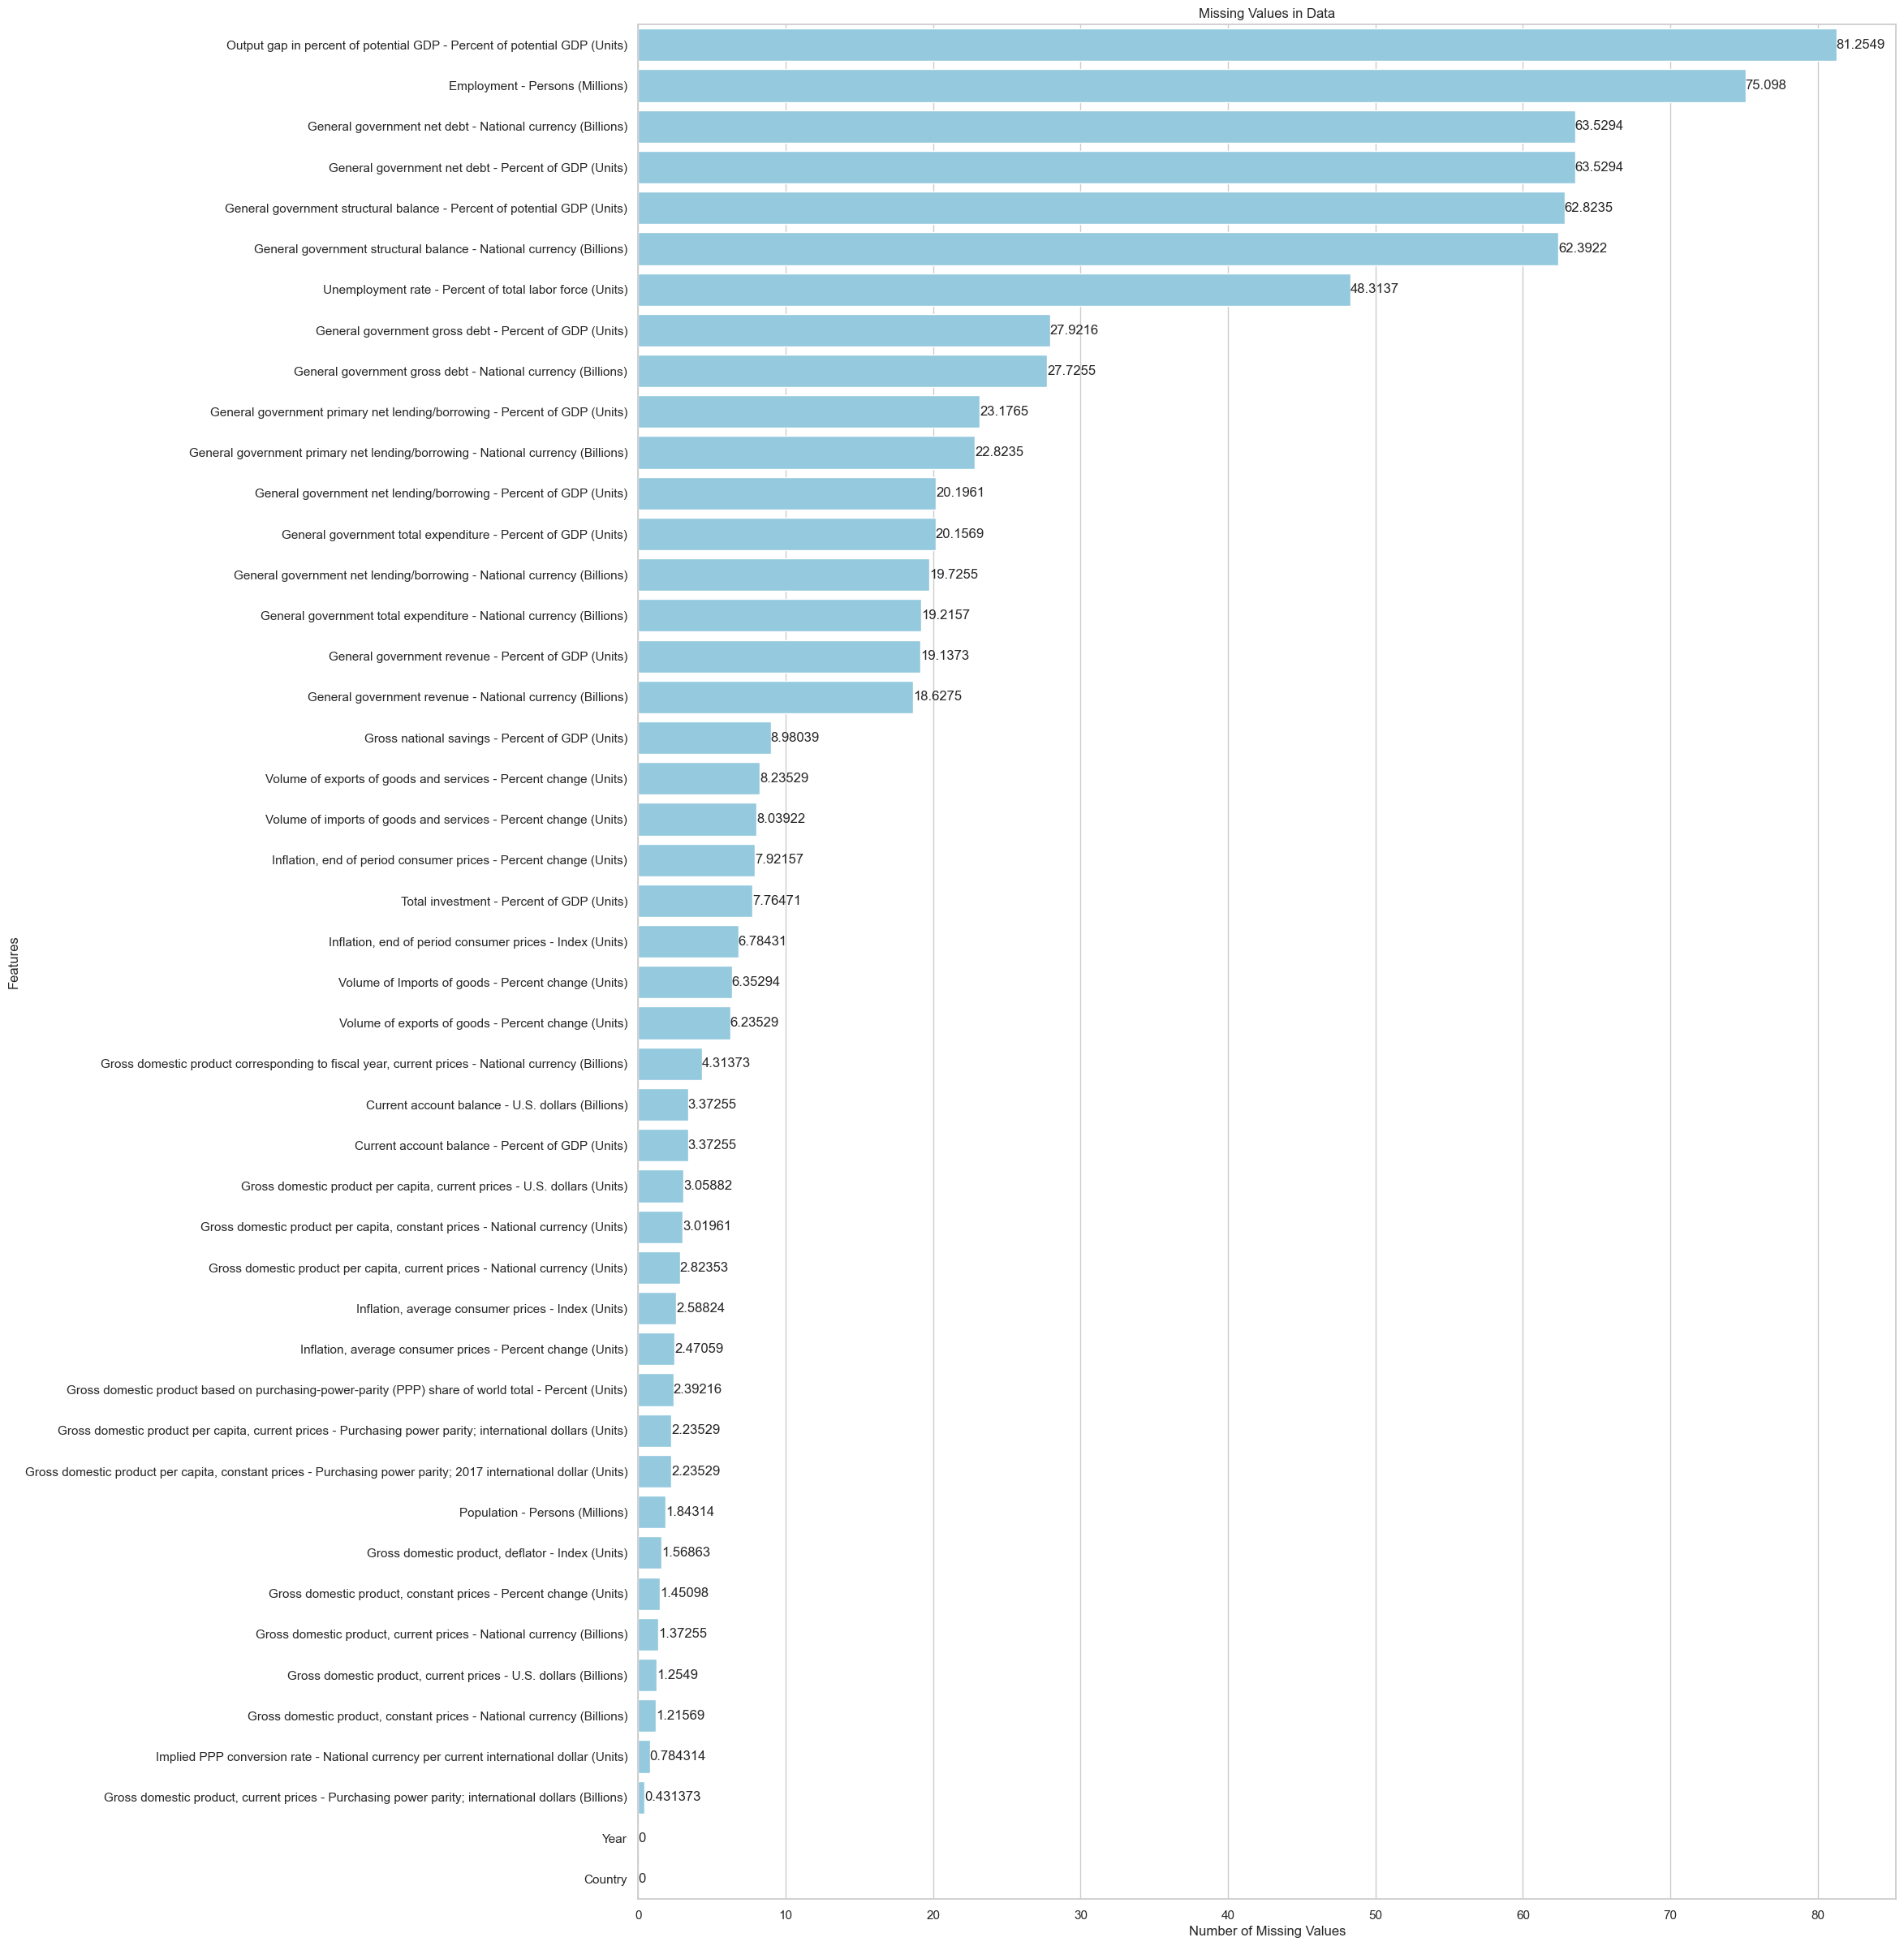

In [9]:
all_blank_count = filtered_weo.iloc[:,1:].isnull().sum().sort_values(ascending=False).to_frame().reset_index()
all_blank_count.columns = ['feature', 'Nulls']

all_blank_count['Nulls %'] = (all_blank_count['Nulls']*100)/filtered_weo.shape[0]

plt.figure(figsize=(20, 30))
ax = sns.barplot(all_blank_count, y='feature', x='Nulls %', color='skyblue')
ax.bar_label(ax.containers[0])
plt.title(f"Missing Values in Data")
plt.ylabel("Features")
plt.xlabel("Number of Missing Values")
plt.show()

## Analysis on Time

In [10]:
def plot_blanks_by_year(dataframe, country_name, ax=None):

    if country_name not in ['All', 'all']:
        # Filter the dataframe for the specified country
        country_data = dataframe[dataframe['Country'] == country_name]
    else:
        country_data = dataframe
    country_data = country_data.sort_values('Year')

    # Extract Year column to a list
    years_list = country_data['Year'].tolist()
    
    # Calculate the number of missing values per row
    missing_values_per_row = country_data.isna().sum(axis=1).tolist()
    
    # Create a DataFrame from the lists
    data = pd.DataFrame({'Year': years_list, 'Missing_Values_Count': missing_values_per_row})
    #data = data.groupby('Year')['Missing_Values_Count'].sum().reset_index()
        
    # Plot the missing values for each year
    plot = sns.lineplot(data, x='Year', y='Missing_Values_Count', ax=ax)
    if ax:
        ax.set_title(f"{country_name} Data")
    else:
        plt.title(f"Missing Features in {country_name} Data")
        plt.ylabel("Count")
        plt.xlabel("Year")

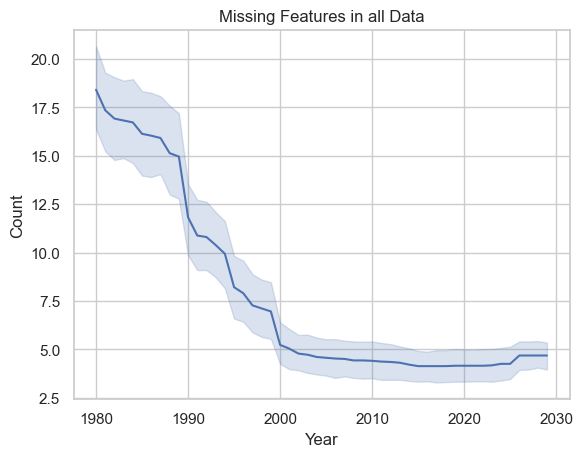

In [11]:
plot_blanks_by_year(filtered_weo, 'all')

## First 17 Countries

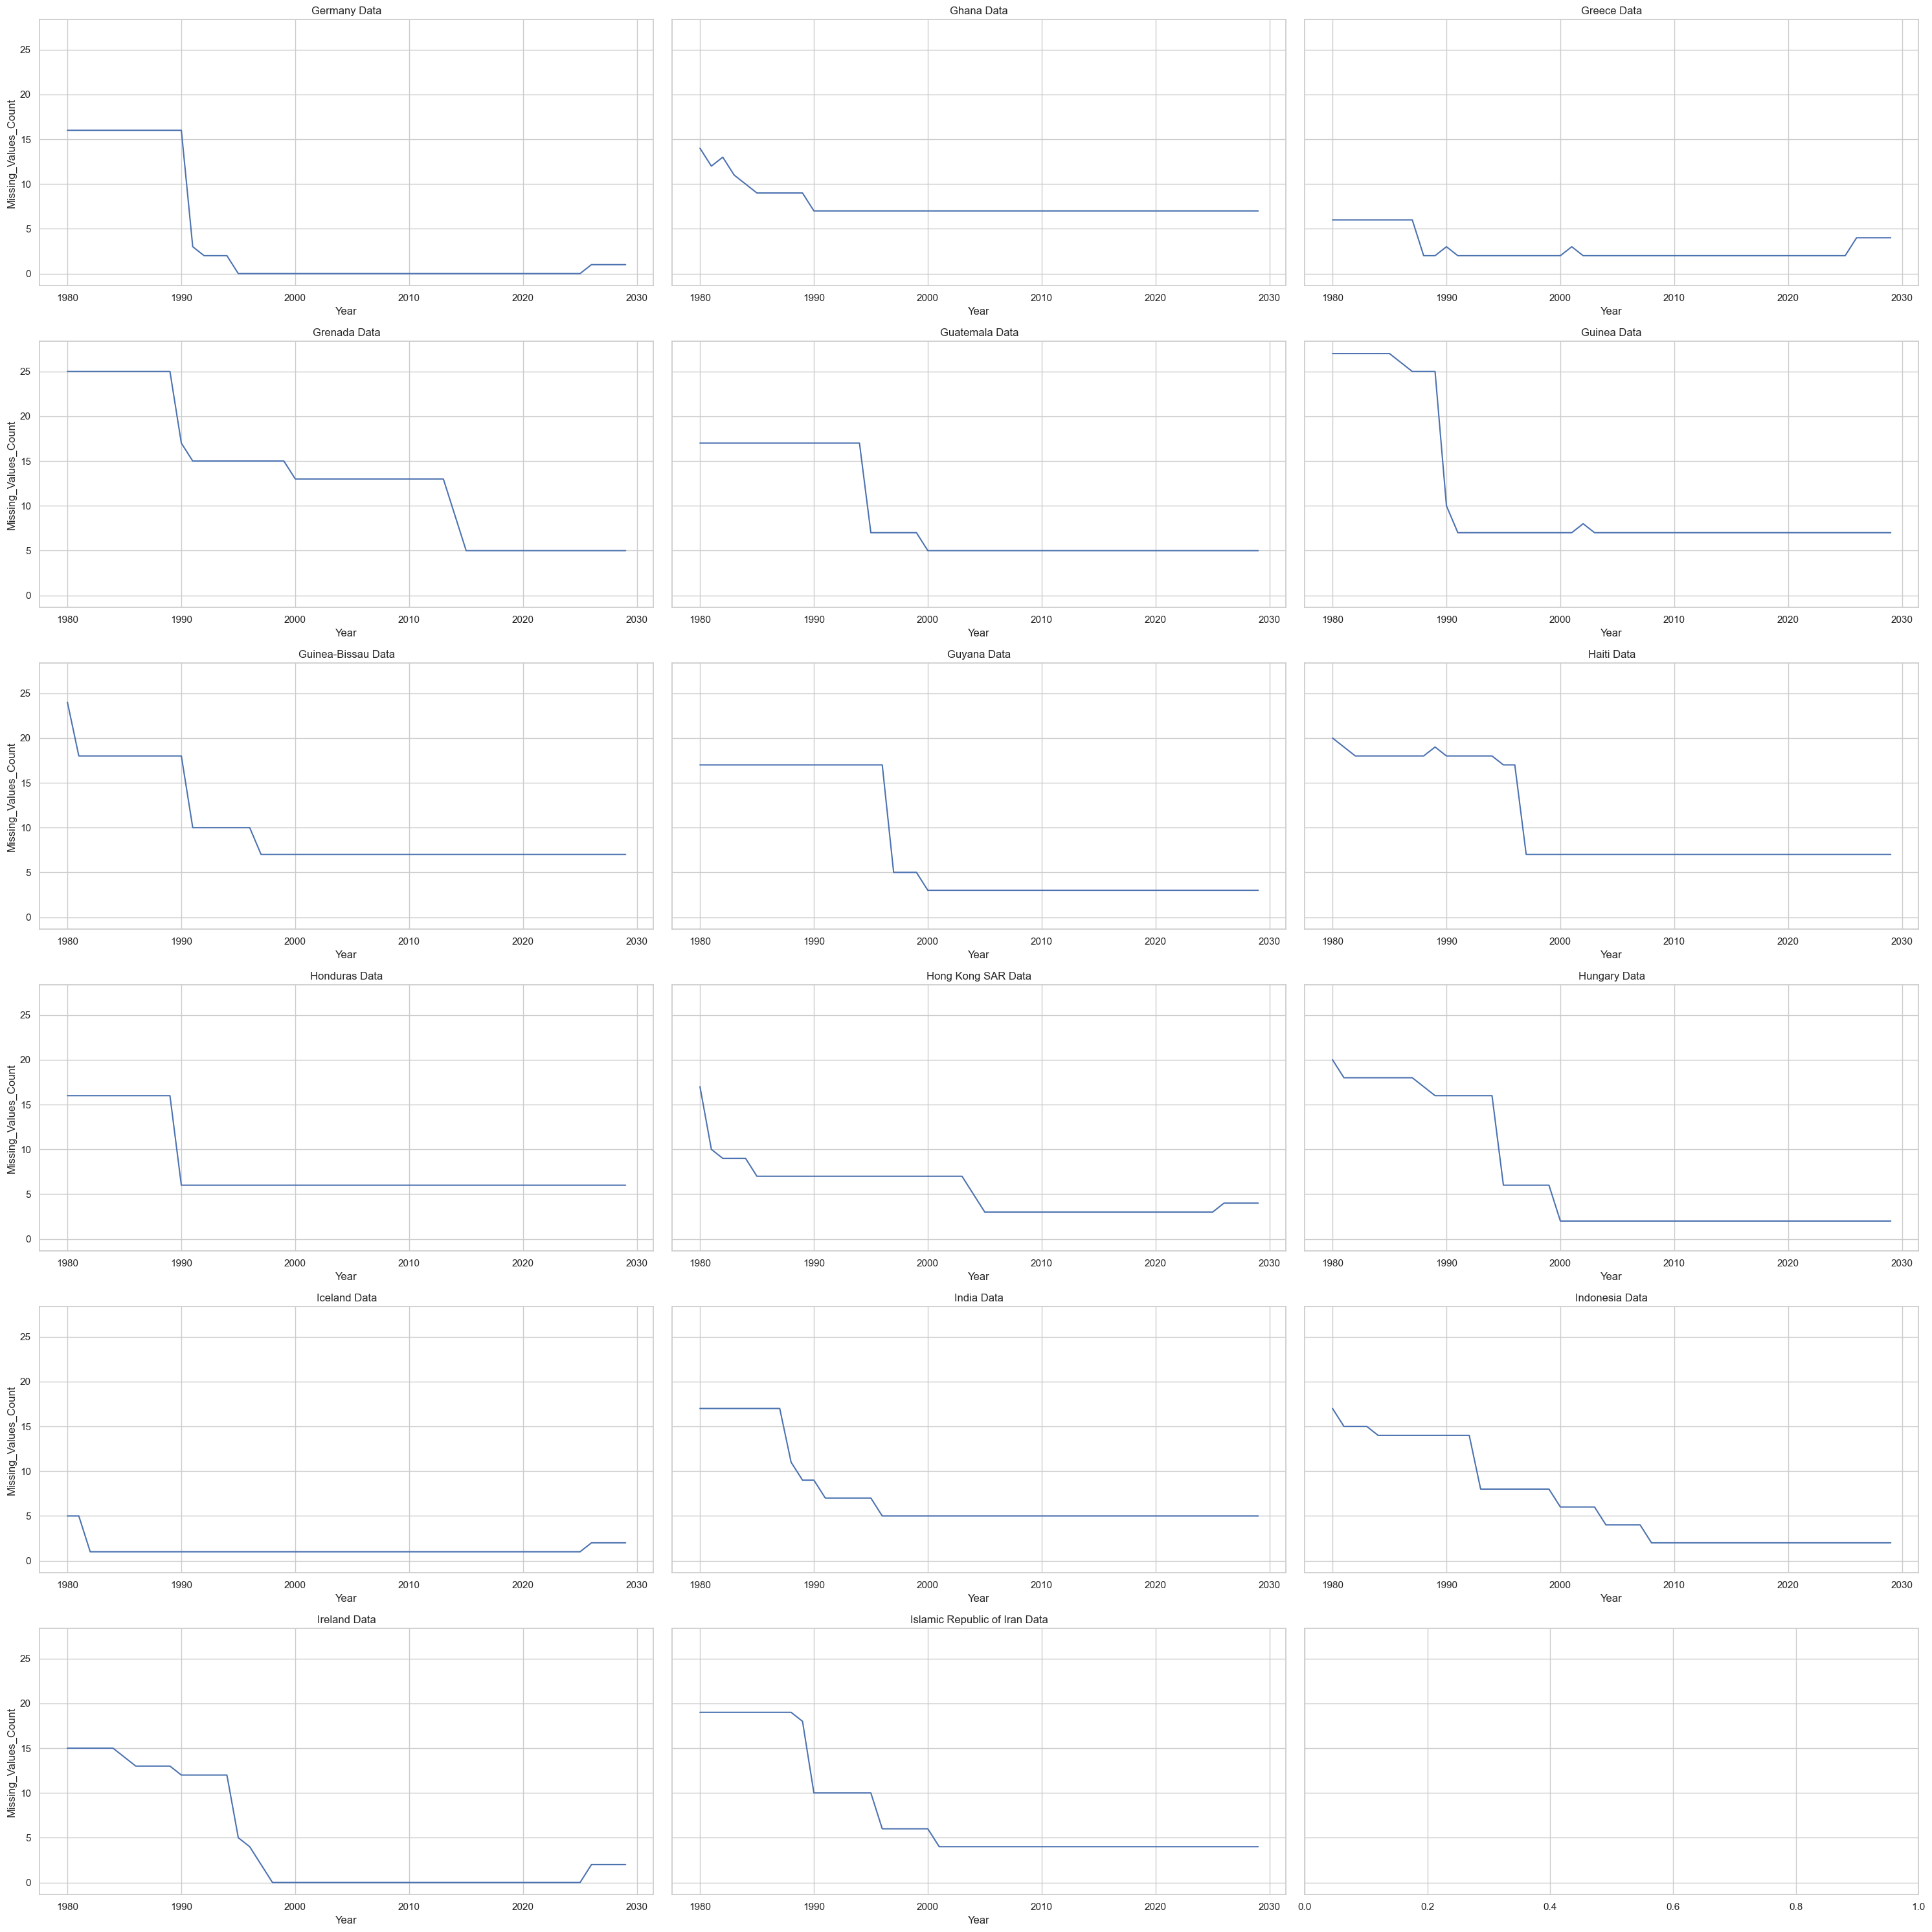

In [12]:
# Create a grid of plots for all countries
fig, axes = plt.subplots(6, 3, figsize=(30, 30), sharex=False, sharey = True)
#fig.suptitle('Change in missing data for countries over the years')
for i, country in enumerate(countries[17*0:17*1]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plot_blanks_by_year(filtered_weo, country, ax=ax)

plt.tight_layout()
plt.show()

## Second 17 Countries

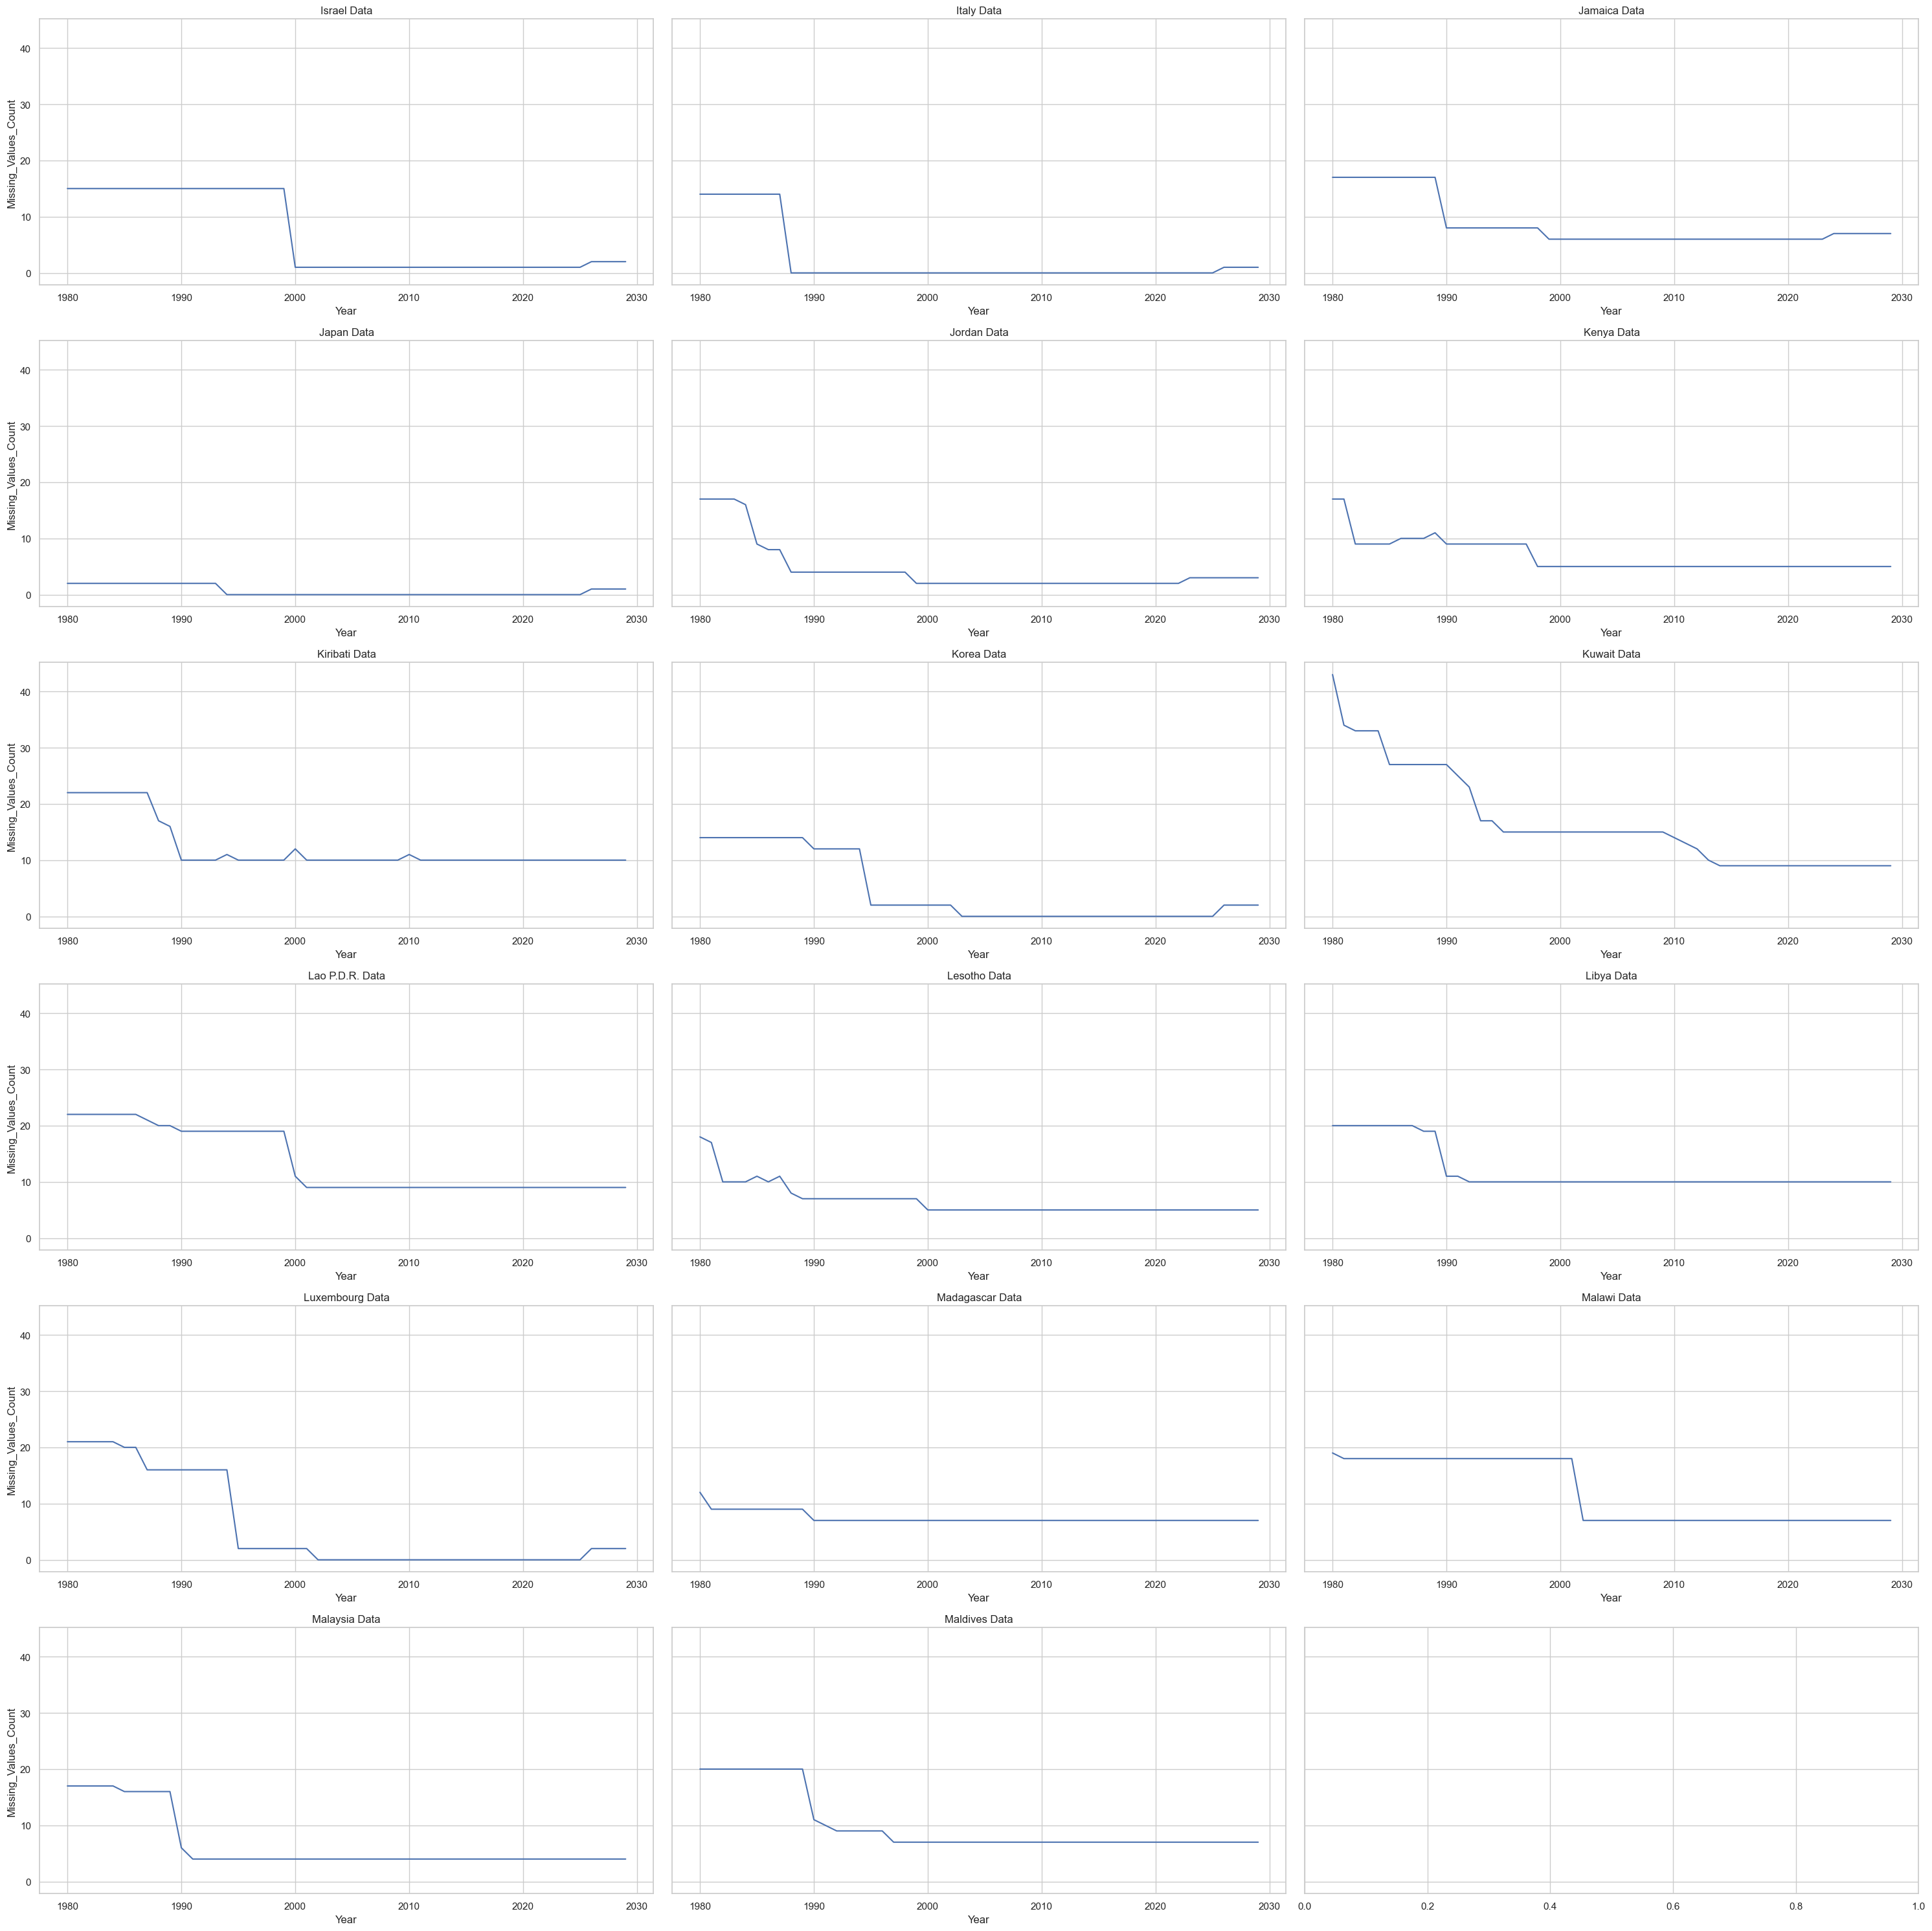

In [13]:
# Create a grid of plots for all countries
fig, axes = plt.subplots(6, 3, figsize=(30, 30), sharex=False, sharey = True)
#fig.suptitle('Change in missing data for countries over the years')
for i, country in enumerate(countries[17*1:17*2]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plot_blanks_by_year(filtered_weo, country, ax=ax)

plt.tight_layout()
plt.show()

## Third 17 Countries

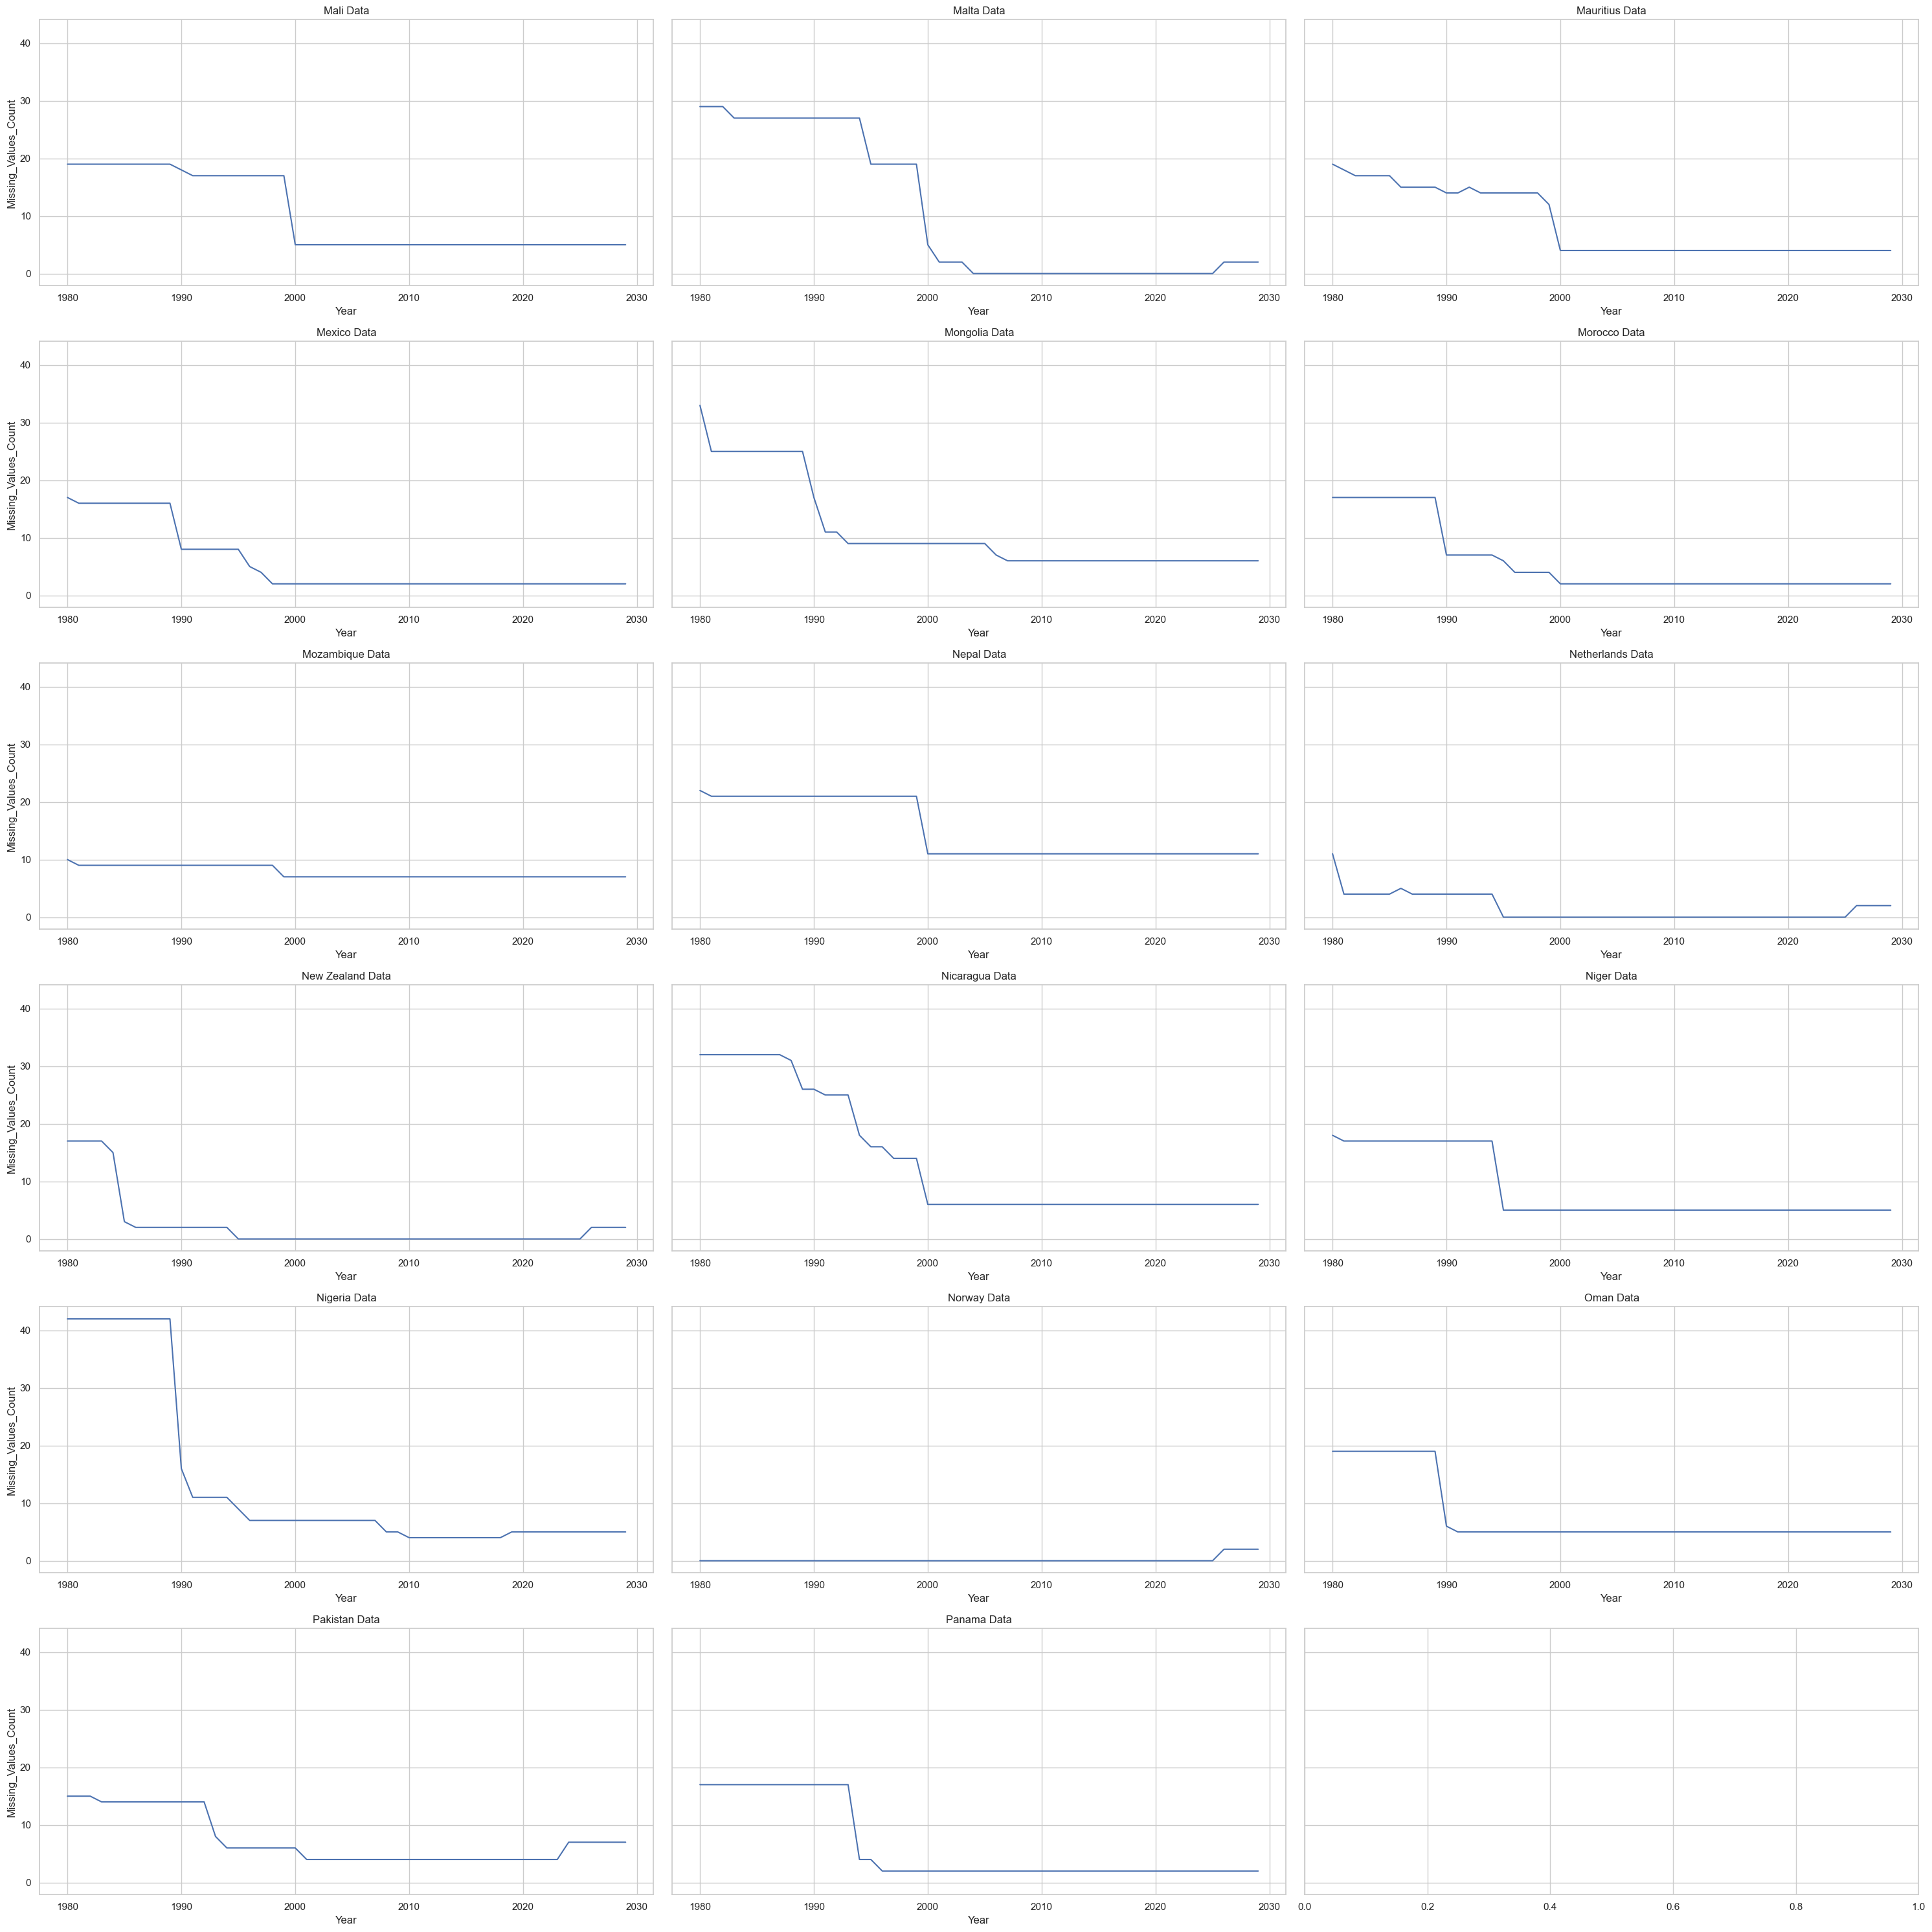

In [14]:
# Create a grid of plots for all countries
fig, axes = plt.subplots(6, 3, figsize=(30, 30), sharex=False, sharey = True)
#fig.suptitle('Change in missing data for countries over the years')
for i, country in enumerate(countries[17*2:17*3]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plot_blanks_by_year(filtered_weo, country, ax=ax)

plt.tight_layout()
plt.show()

- Drop all ‘percent of GDP’ columns
- Countries to drop - Grenada, Kuwait, Lao P.D.R., Luxembourg, Malawi, Ghana
- Countries to drop (before 1991 invalid) - Guatemala, Guyana, Haiti, Guinea-Bissau, Hungary, Jamaica, Israel, Kiribati, Malaysia, Maldives, Germany


#### Filtering out data before 1990

In [15]:
drop_countries = ['Grenada', 'Kuwait', 'Lao P.D.R.', 'Luxembourg', 'Malawi', 'Ghana', 'Guatemala', 'Guyana',
                  'Haiti', 'Guinea-Bissau', 'Hungary', 'Jamaica', 'Israel', 'Kiribati', 'Malaysia', 'Maldives', 'Germany']
new_filtered_weo = filtered_weo[filtered_weo.Year>1990]

#### Dropping bad data countries

In [16]:
drop_countries = ['Grenada', 'Kuwait', 'Lao P.D.R.', 'Luxembourg', 'Malawi', 'Ghana', 'Guatemala', 'Guyana',
                  'Haiti', 'Guinea-Bissau', 'Hungary', 'Jamaica', 'Israel', 'Kiribati', 'Malaysia', 'Maldives', 'Germany']
new_filtered_weo = new_filtered_weo[new_filtered_weo.Country.isin(drop_countries)]

#### Drop `Percent of GDP` Columns

In [17]:
non_pctgdp_cols = list(filter(lambda x: 'Percent of GDP' not in x, new_filtered_weo.columns.to_list()))

new_filtered_weo = new_filtered_weo[non_pctgdp_cols]

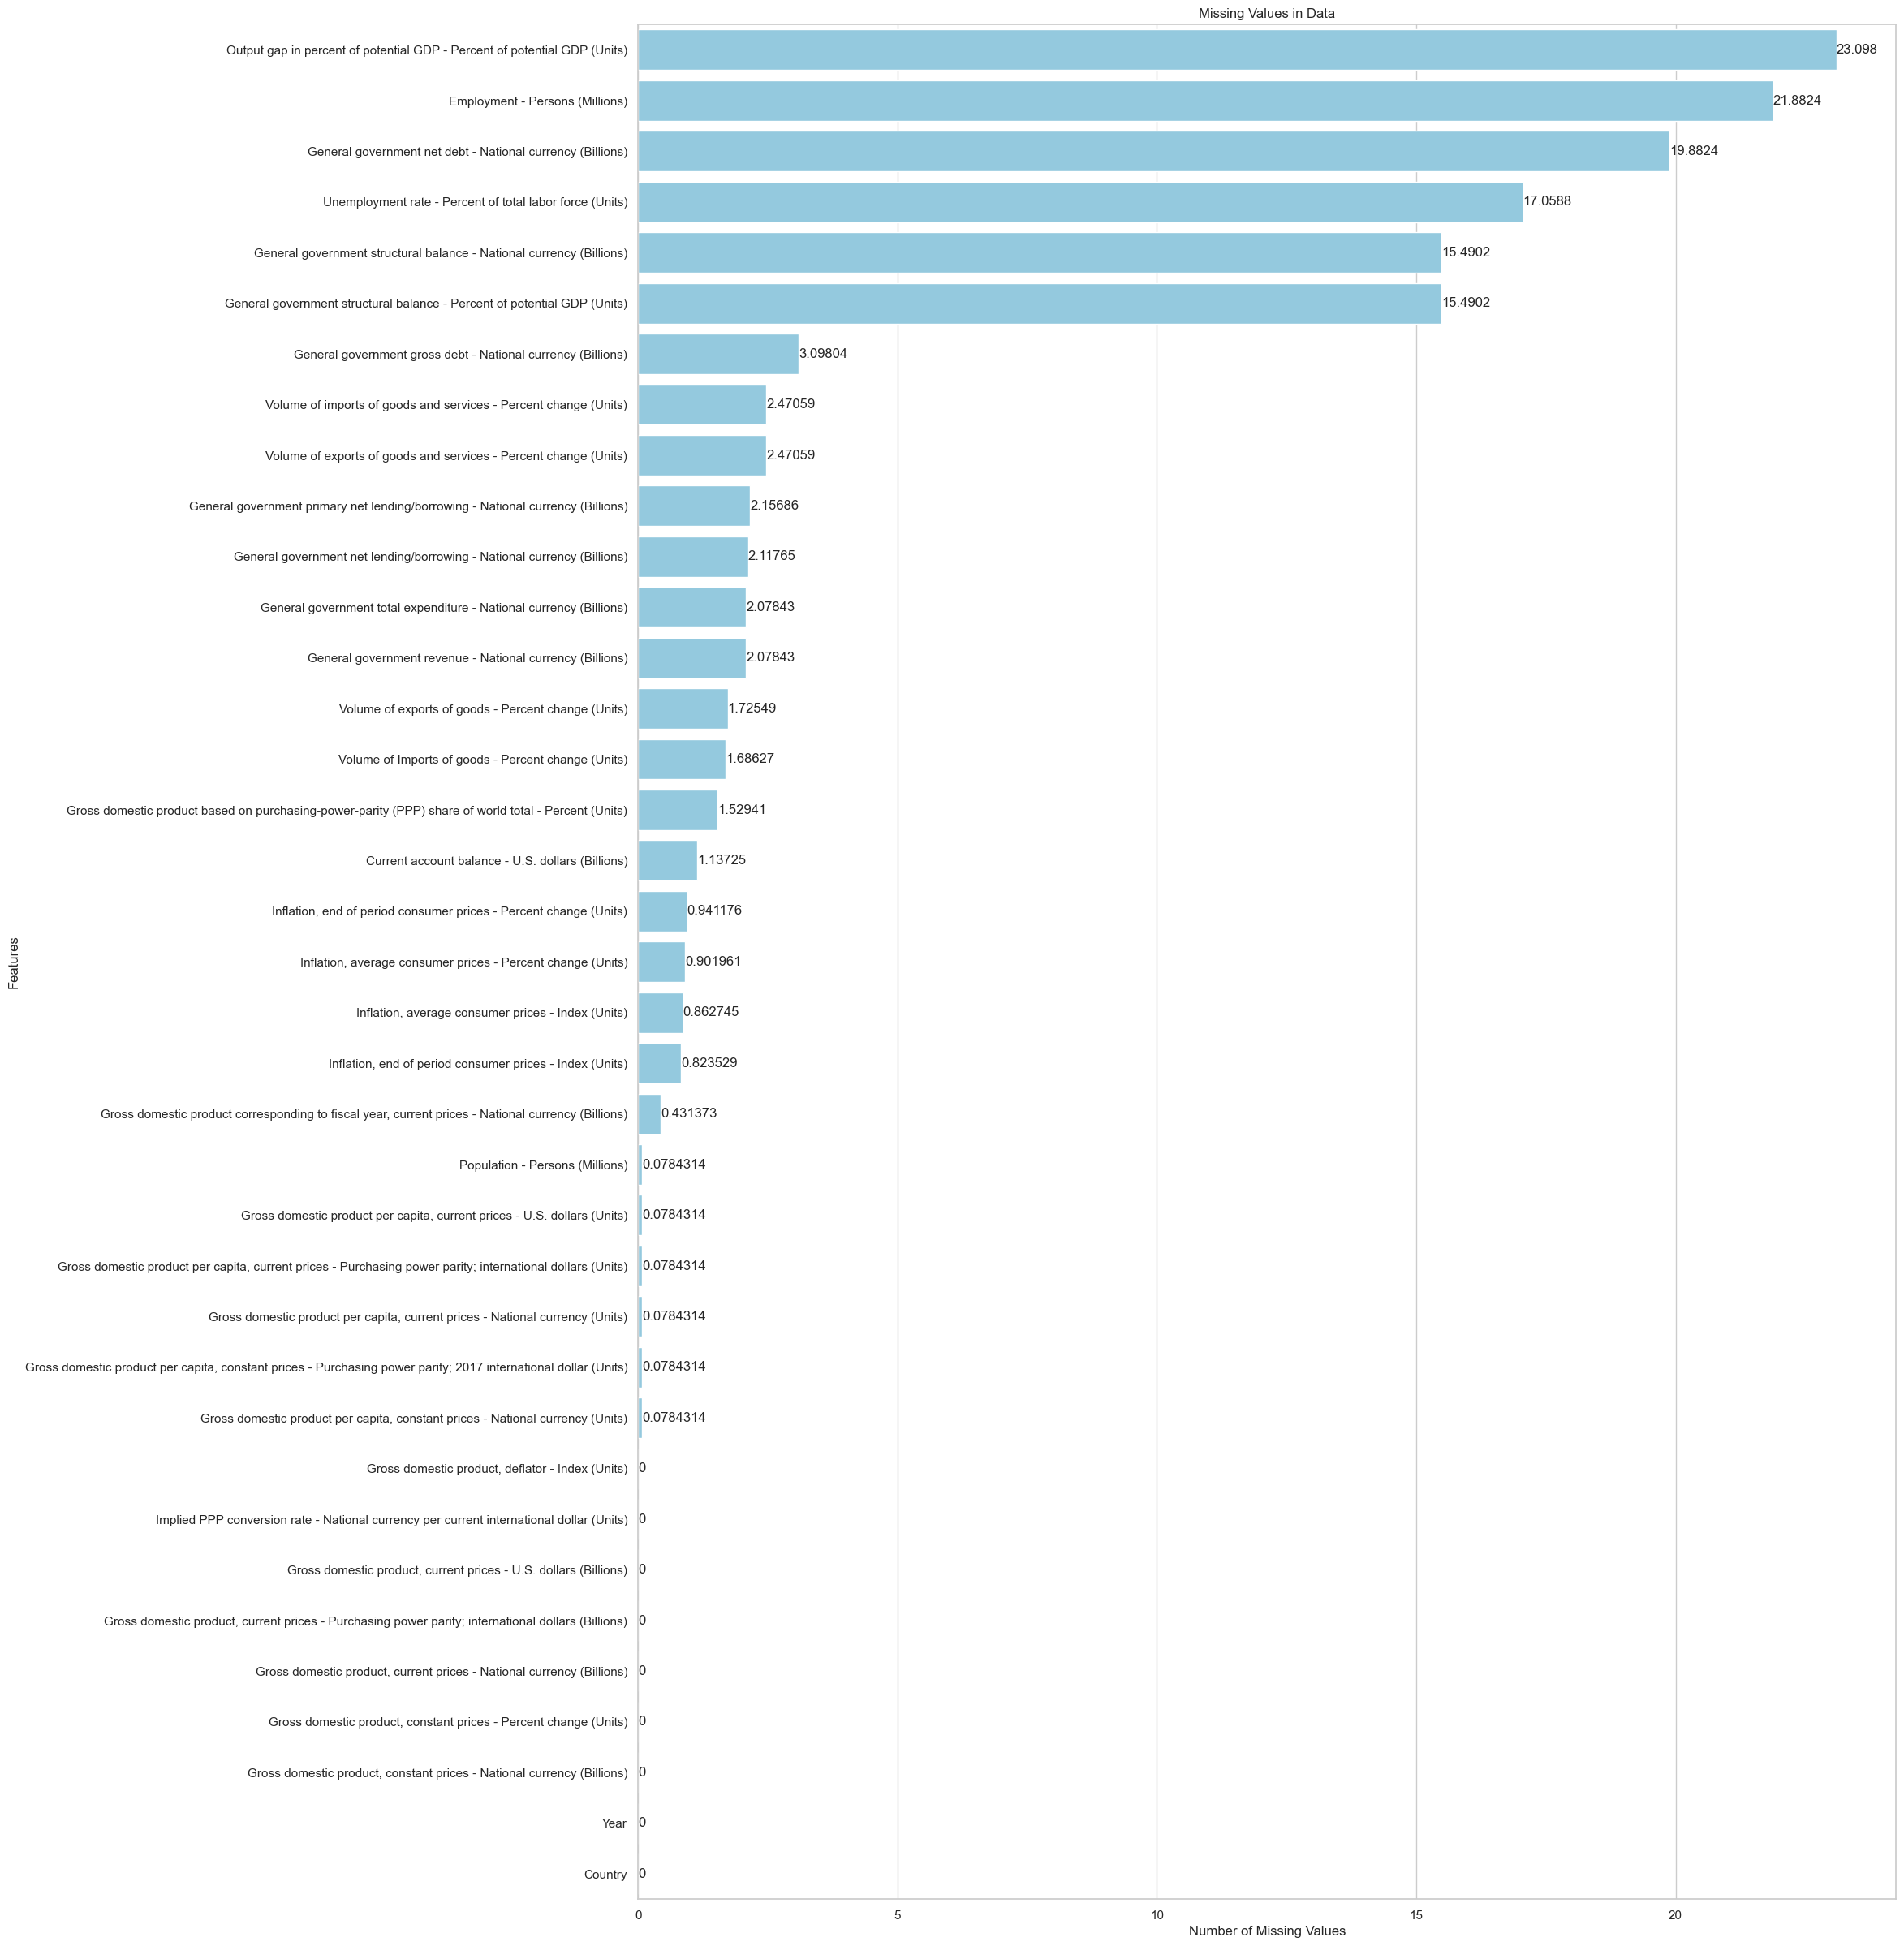

In [18]:
all_blank_count = new_filtered_weo.iloc[:,1:].isnull().sum().sort_values(ascending=False).to_frame().reset_index()
all_blank_count.columns = ['feature', 'Nulls']

all_blank_count['Nulls %'] = (all_blank_count['Nulls']*100)/filtered_weo.shape[0]

plt.figure(figsize=(20, 30))
ax = sns.barplot(all_blank_count, y='feature', x='Nulls %', color='skyblue')
ax.bar_label(ax.containers[0])
plt.title(f"Missing Values in Data")
plt.ylabel("Features")
plt.xlabel("Number of Missing Values")
plt.show()

In [19]:
new_filtered_weo.shape

(663, 38)

## Analysis on feature wise Nulls

In [20]:
def plot_country_blanks(dataframe, country_name, tot=False, filter=True, show=False):
    # Filter the dataframe for the specified country
    country_data = dataframe[dataframe['Country'] == country_name]
    
    # Count the number of missing values in each column
    missing_values = country_data.isnull().sum().sort_values(ascending=False).to_frame().reset_index()
    missing_values.columns = ['feature', 'Nulls']
    data_return = country_data
    
    if tot:
        print('Total Rows - ',country_data.shape[0])

    if filter:
        missing_values = missing_values[missing_values.Nulls>0]
        features = ['Year', 'Country']
        features.extend(missing_values.feature.to_list())
        
        data_return = data_return[features]
    
    # Plot the missing values for each column
    ax = sns.barplot(missing_values, y='feature', x='Nulls', color='skyblue')
    ax.bar_label(ax.containers[0])
    plt.title(f"Missing Values in {country_name} Data")
    plt.ylabel("Features")
    plt.xlabel("Number of Missing Values")
    plt.xticks(rotation=45)
    plt.show()
    
    if show:
        return data_return



In [20]:
new_countries = new_filtered_weo.Country.unique()

Total Rows -  39


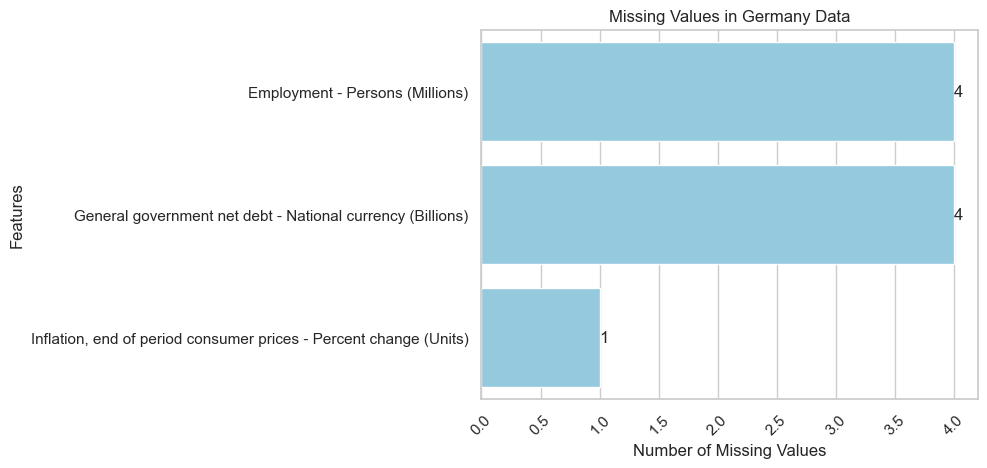

,Year,Country,Employment - Persons (Millions),General government net debt - National currency (Billions),"Inflation, end of period consumer prices - Percent change (Units)"
311,1991,Germany,37.078,NaN,NaN
312,1992,Germany,36.564,NaN,3.300
313,1993,Germany,36.172,NaN,4.200
314,1994,Germany,35.905,NaN,2.500
315,1995,Germany,35.762,784.489,1.500
316,1996,Germany,35.523,851.599,1.457
317,1997,Germany,35.302,893.192,1.445
318,1998,Germany,35.551,946.292,0.130
319,1999,Germany,35.932,988.381,1.423
320,2000,Germany,36.065,946.420,2.041


In [21]:
plot_country_blanks(new_filtered_weo, new_countries[0], tot=True, show=True)